# Sales retails Project

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [34]:
# Import the pandas library and read the CSV file 'retail_sales_dataset.csv'
df = pd.read_csv('retail_sales_dataset.csv')

# Display the first five rows of the DataFrame to get an overview of the data
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [35]:
# Get the shape (dimensions) of the DataFrame 'df'
df.shape

(1000, 9)

In [36]:
df.dtypes.value_counts()

int64     5
object    4
dtype: int64

# Heatmap to visualize missing values in the DataFrame

Transaction ID      0.0
Date                0.0
Customer ID         0.0
Gender              0.0
Age                 0.0
Product Category    0.0
Quantity            0.0
Price per Unit      0.0
Total Amount        0.0
dtype: float64

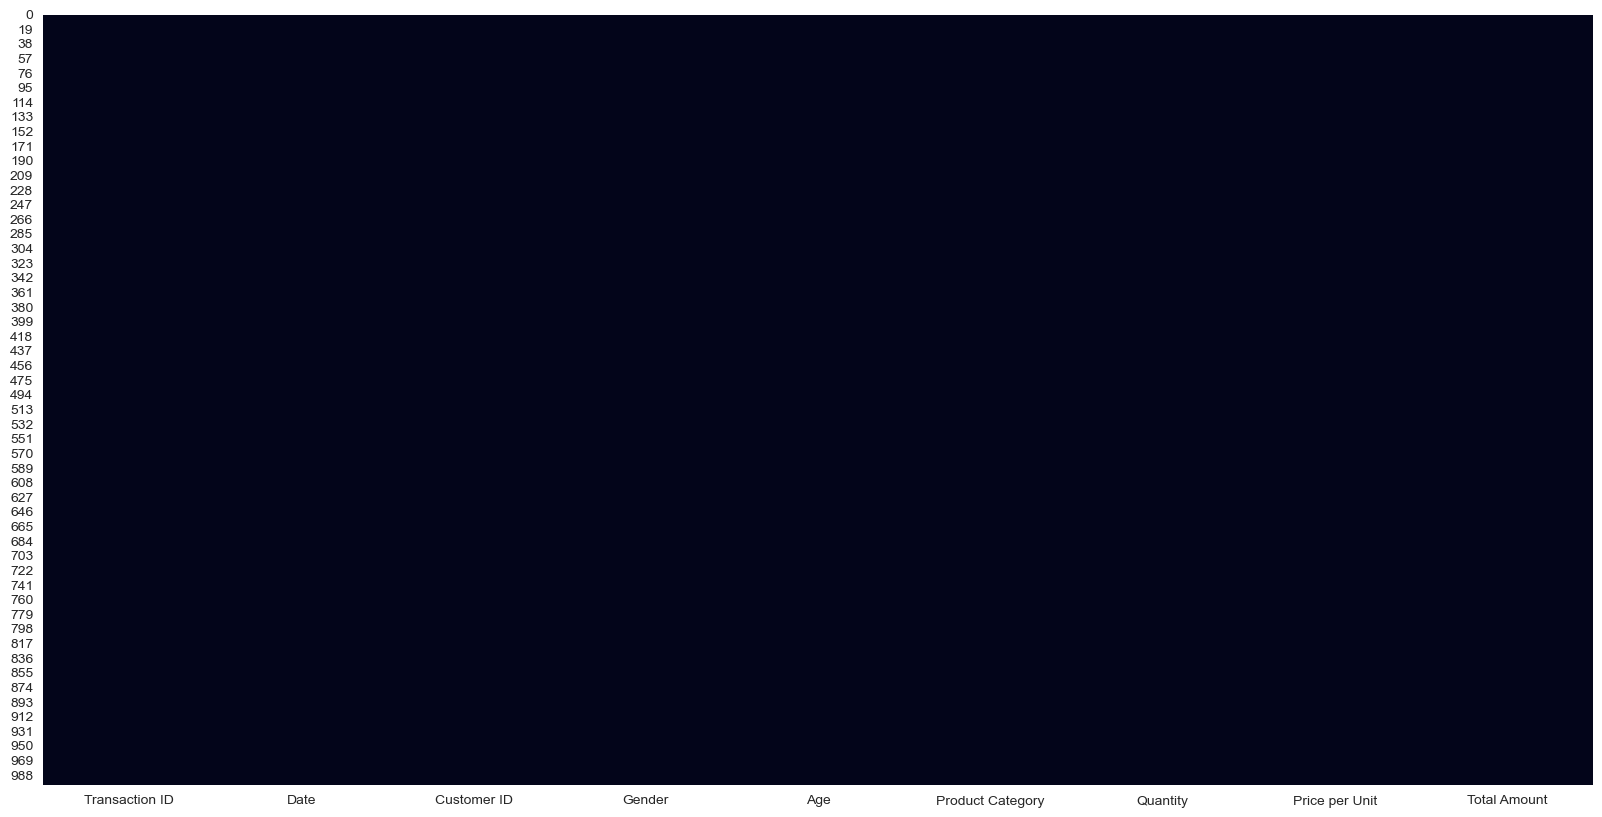

In [37]:
# Create a new figure for the heatmap with a specific size
plt.figure(figsize=(20, 10))

# Generate a heatmap to visualize missing values in the DataFrame 'df'
sns.heatmap(df.isna(), cbar=False)

# Calculate the percentage of missing values for each column and sort them in ascending order
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

In [38]:
# Remove specified columns from the DataFrame 'df' to keep the ones of interest
df = df.drop(['Transaction ID', 'Customer ID', 'Price per Unit'], axis=1)

In [39]:
df.head()

,Date,Gender,Age,Product Category,Quantity,Total Amount
0,2023-11-24,Male,34,Beauty,3,150
1,2023-02-27,Female,26,Clothing,2,1000
2,2023-01-13,Male,50,Electronics,1,30
3,2023-05-21,Male,37,Clothing,1,500
4,2023-05-06,Male,30,Beauty,2,100


In [8]:
# Import the LabelEncoder class from scikit-learn's preprocessing module
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
le = LabelEncoder()

# Use the LabelEncoder to transform and encode the 'Gender' column in the DataFrame 'df'
df['Gender'] = le.fit_transform(df['Gender'])

In [9]:
# Generate summary statistics of the DataFrame 'df'
df.describe()

,Gender,Age,Quantity,Total Amount
count,1000.00000,1000.00000,1000.000000,1000.000000
mean,0.49000,41.39200,2.514000,456.000000
std,0.50015,13.68143,1.132734,559.997632
min,0.00000,18.00000,1.000000,25.000000
25%,0.00000,29.00000,1.000000,60.000000
50%,0.00000,42.00000,3.000000,135.000000
75%,1.00000,53.00000,4.000000,900.000000
max,1.00000,64.00000,4.000000,2000.000000


# Age group distribution

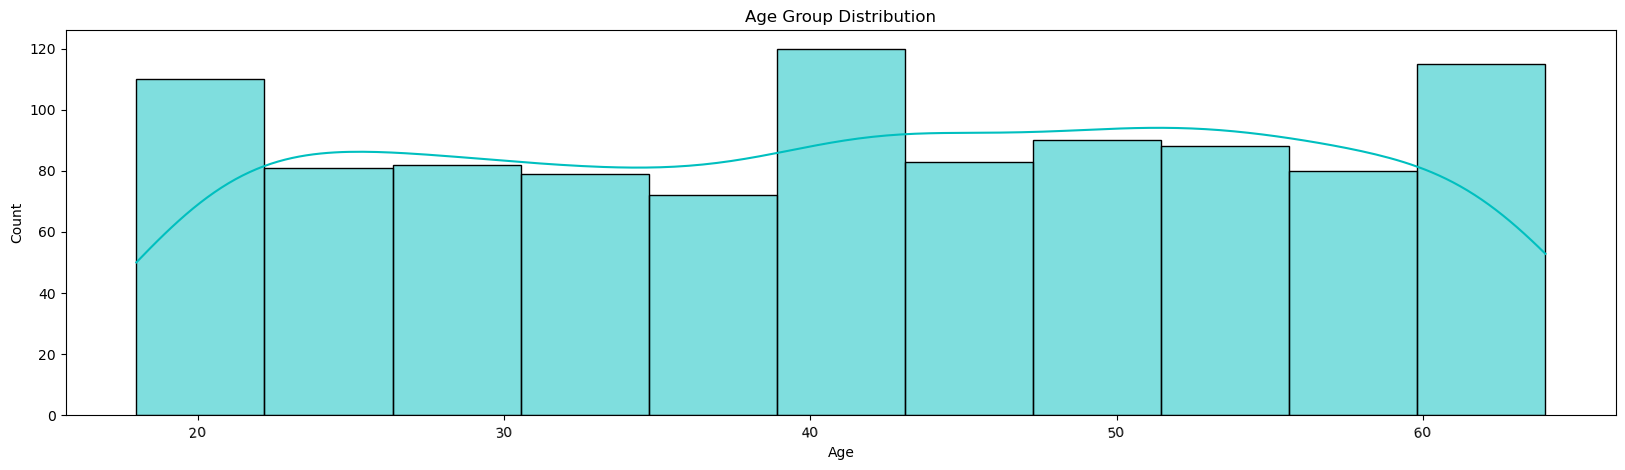

In [11]:
# Create a new figure for the histogram plot with a specific size
plt.figure(figsize=(20, 5))

# Generate a histogram and kernel density estimate (KDE) plot for the 'Age' column in the DataFrame 'df'
sns.histplot(data=df,
             x=df['Age'].sort_values(),
             kde=True,
             color='c')

# Set the title of the plot
plt.title('Age Group Distribution')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=5)

# Display the plot
plt.show()

# Distribution of genders in the database

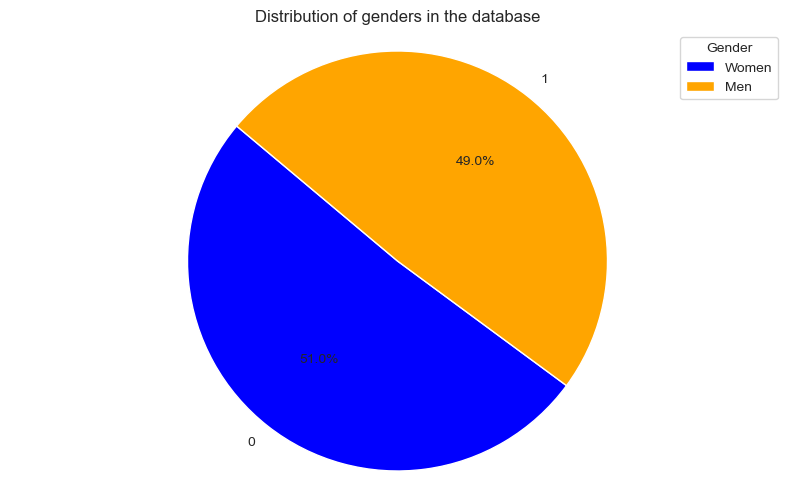

In [23]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of each gender
genre_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange']
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Add a custom legend
legend_labels = ['Women', 'Men']
plt.legend(legend_labels, title="Gender", loc="best")

# Customize the pie chart
plt.title("Distribution of genders in the database")
plt.axis('equal')  # To ensure the pie chart is a circle

# Display the pie chart
plt.show()

# Average purchase quantity by age group, separated by gender

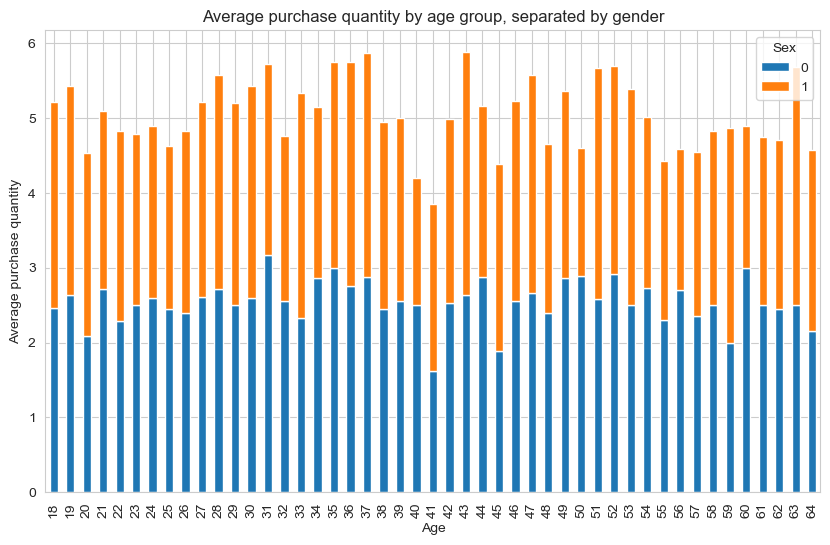

In [24]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by age and gender and calculate the average purchase quantity
grouped_data = df.groupby(['Age', 'Gender'])['Quantity'].mean().unstack()

# Create a stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title("Average purchase quantity by age group, separated by gender")
plt.xlabel("Age")
plt.ylabel("Average purchase quantity")
plt.legend(title="Sex")

# Display the chart
plt.show()

# Average purchase quantity by age group, separated by gender

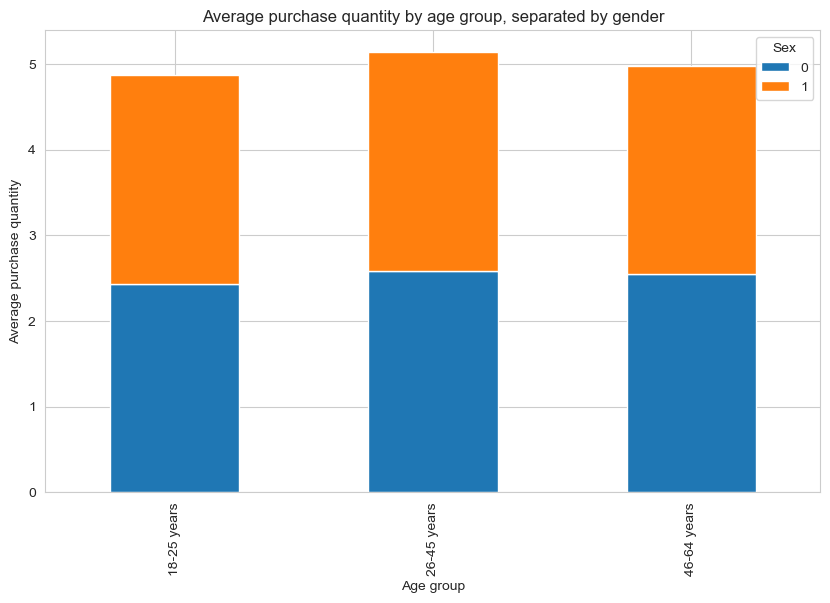

In [25]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to categorize age into groups
def categorize_age(age):
    if 18 <= age <= 25:
        return "18-25 years"
    elif 26 <= age <= 45:
        return "26-45 years"
    else:
        return "46-64 years"

# Apply the function to create a new column "AgeGroup"
df['AgeGroup'] = df['Age'].apply(categorize_age)

# Group the data by age group and gender, then calculate the average purchase quantity
grouped_data = df.groupby(['AgeGroup', 'Gender'])['Quantity'].mean().unstack()

# Create a stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title("Average purchase quantity by age group, separated by gender")
plt.xlabel("Age group")
plt.ylabel("Average purchase quantity")
plt.legend(title="Sex")

# Display the chart
plt.show()

In [15]:
# Get the unique values in the 'Product Category' column and store them in 'Product_Category_List'
Product_Category_List = df['Product Category'].unique()

# Print the list of unique product categories
print(Product_Category_List)

['Beauty' 'Clothing' 'Electronics']


# Purchase frequency by product category and gender

/var/folders/p2/dnh7l7yj199d_cmjhgy7v5zm0000gn/T/ipykernel_1110/4270488738.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Category', y='Quantity', hue='Gender', data=pivot_table, ci=None)


AttributeError: 'Legend' object has no attribute 'get_handles_labels'

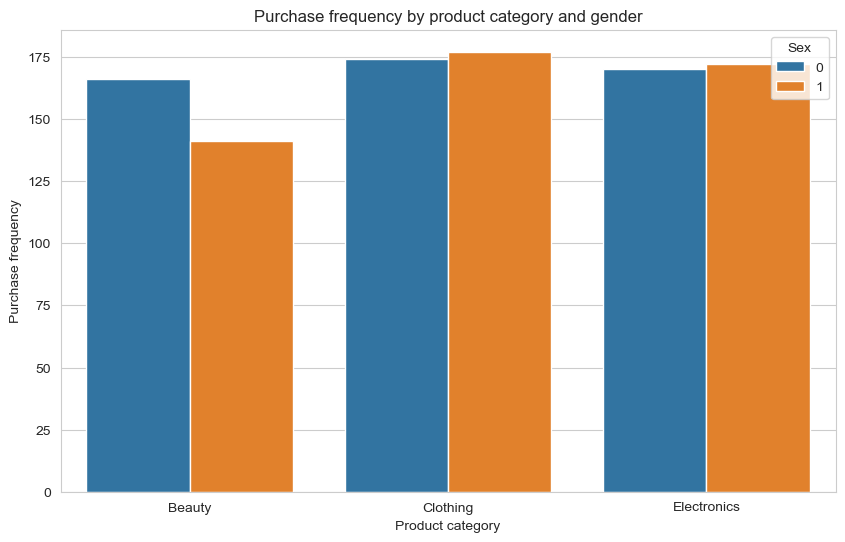

In [27]:
# Create a pivot table to calculate the purchase frequency for each combination of product category and gender
pivot_table = pd.pivot_table(df, values='Quantity', index=['Product Category', 'Gender'], aggfunc='count').reset_index()

# Use seaborn to create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Quantity', hue='Gender', data=pivot_table, ci=None)

# Customize the chart
plt.title("Purchase frequency by product category and gender")
plt.xlabel("Product category")
plt.ylabel("Purchase frequency")
plt.legend(title="Sex")

# Modify the legend
legend_labels = {0: 'Women', 1: 'Men'}
handles, _ = plt.gca().get_legend().get_handles_labels()
plt.legend(handles=handles, labels=[f'{legend_labels[int(label.get_text())]} ({label.get_text()})' for label in plt.gca().get_legend().get_texts()])

# Display the chart
plt.show()

# Category most purchased by gender

In [28]:
import pandas as pd

# Separate the data into two separate DataFrames for men and women
df_hommes = df[df['Gender'] == 1]  # Assuming 1 represents men
df_femmes = df[df['Gender'] == 0]  # Assuming 0 represents women

# Find the most purchased category for men
categorie_plus_achetee_hommes = df_hommes['Product Category'].value_counts().idxmax()

# Find the most purchased category for women
categorie_plus_achetee_femmes = df_femmes['Product Category'].value_counts().idxmax()

# Print the results
print("Category most purchased by men:", categorie_plus_achetee_hommes)
print("Category most purchased by women:", categorie_plus_achetee_femmes)

Category most purchased by men: Clothing
Category most purchased by women: Clothing


# Most consumed product category by age

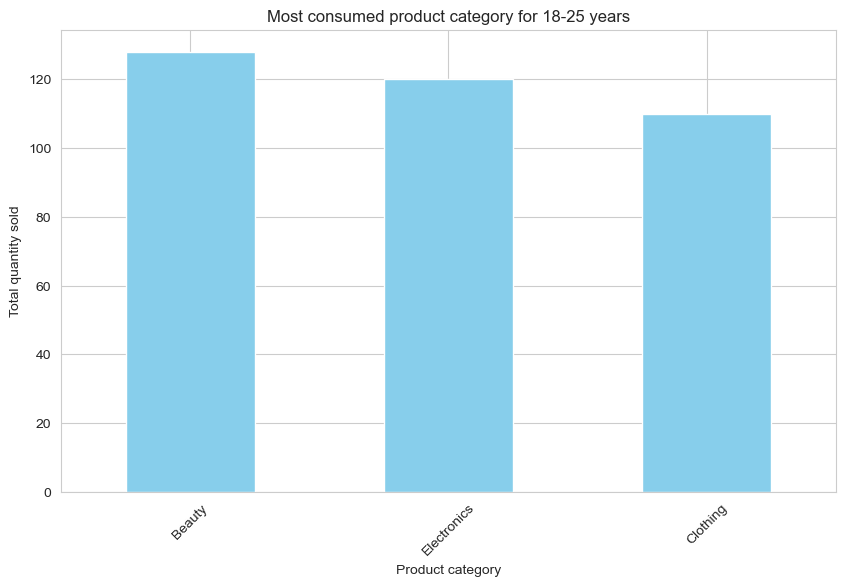

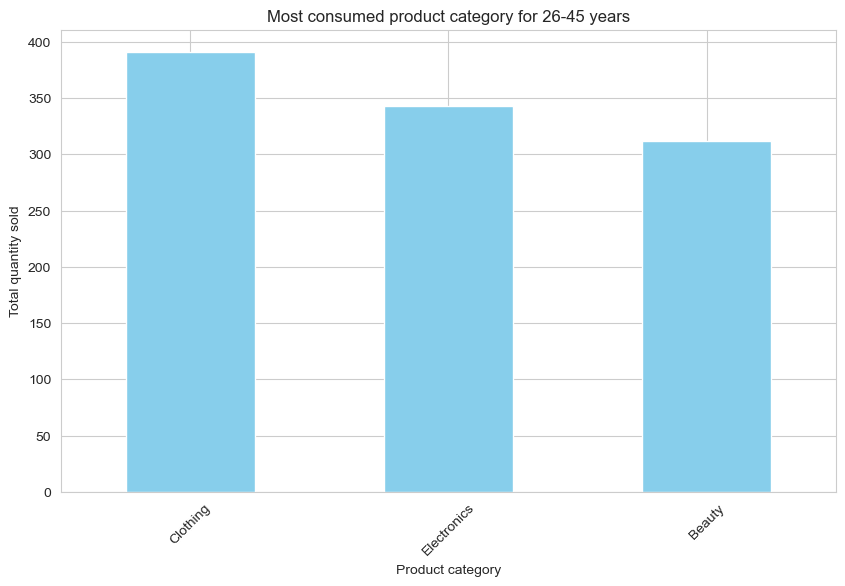

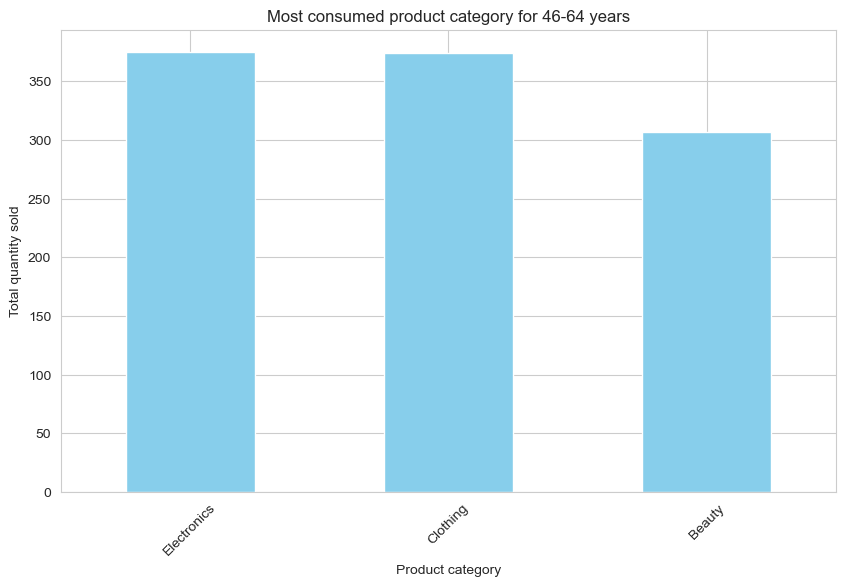

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the age boundaries for each group
ages_bins = [18, 25, 45, 64]

# Define labels for each age group
age_labels = ['18-25 years', '26-45 years', '46-64 years']

# Use pd.cut() to create a new 'AgeGroup' column based on the age boundaries
df['AgeGroup'] = pd.cut(df['Age'], bins=ages_bins, labels=age_labels)

# Group the data by age group and product category, then calculate the sum of quantities sold
grouped_data = df.groupby(['AgeGroup', 'Product Category'])['Quantity'].sum().unstack()

# Create a chart for each age group
for age_group in age_labels:
    plt.figure(figsize=(10, 6))
    data = grouped_data.loc[age_group].sort_values(ascending=False)
    data.plot(kind='bar', color='skyblue')
    plt.title(f"Most consumed product category for {age_group}")
    plt.xlabel("Product category")
    plt.ylabel("Total quantity sold")
    plt.xticks(rotation=45)
    plt.show()

# Total number of products sold per month

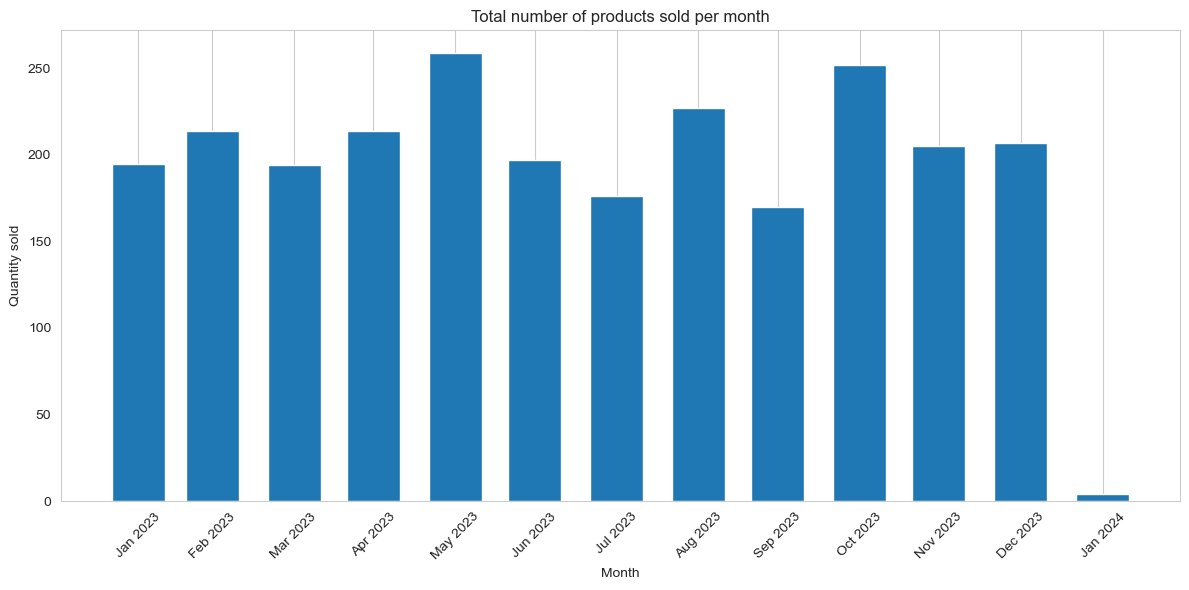

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Resample the data to monthly frequency and calculate the sum of quantities sold for each month
df_monthly = df.resample('M', on='Date')['Quantity'].sum().reset_index()

# Create a bar chart showing the quantities sold for each month of the year
plt.figure(figsize=(12, 6))
plt.bar(df_monthly['Date'], df_monthly['Quantity'], width=20, align='center')
plt.title("Total number of products sold per month")
plt.xlabel("Month")
plt.ylabel("Quantity sold")
plt.xticks(df_monthly['Date'], df_monthly['Date'].dt.strftime('%b %Y'), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# % of each product category sold per month

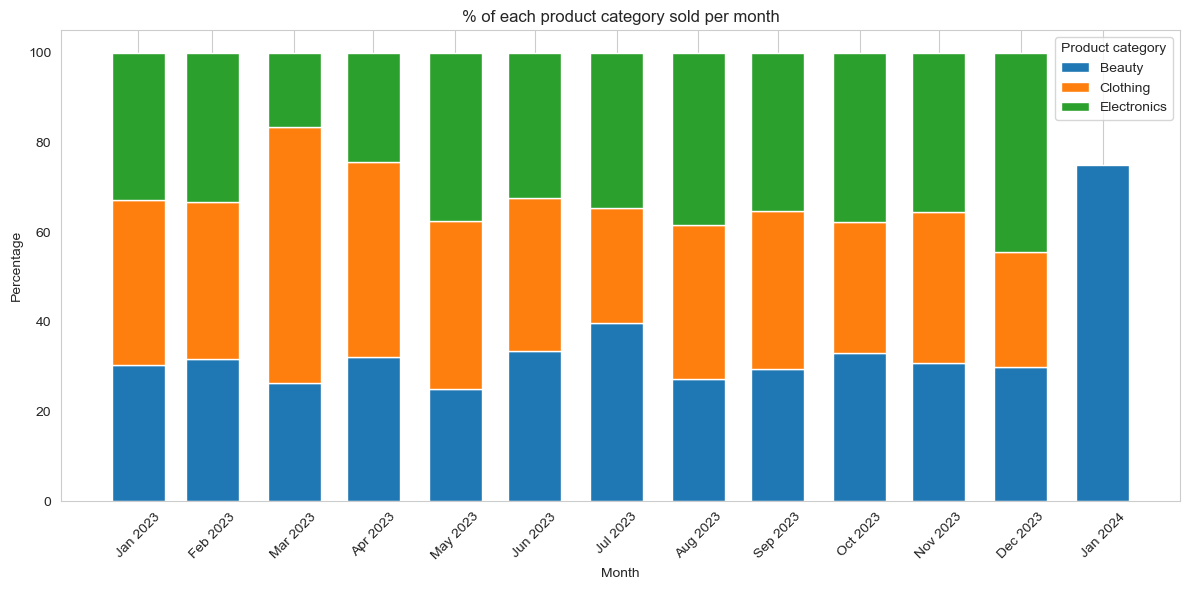

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by month and calculate the sum of quantities sold for each month
df_monthly = df.resample('M', on='Date')['Quantity'].sum().reset_index()

# Group the data by month and by product category, then calculate the percentage of each category sold
df_monthly_category = df.groupby([df['Date'].dt.strftime('%Y-%m'), 'Product Category'])['Quantity'].sum().unstack()
df_monthly_category = df_monthly_category.div(df_monthly_category.sum(axis=1), axis=0) * 100

# Create a stacked bar chart showing the percentages of each product category sold per month
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
bottom = None

for col in df_monthly_category.columns:
    plt.bar(df_monthly['Date'], df_monthly_category[col], width=20, align='center', label=col, bottom=bottom)
    if bottom is None:
        bottom = df_monthly_category[col].values
    else:
        bottom += df_monthly_category[col].values

plt.title("% of each product category sold per month")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.xticks(df_monthly['Date'], df_monthly['Date'].dt.strftime('%b %Y'), rotation=45)
plt.legend(title="Product category")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Time series on sales trends

<function matplotlib.pyplot.show(close=None, block=None)>

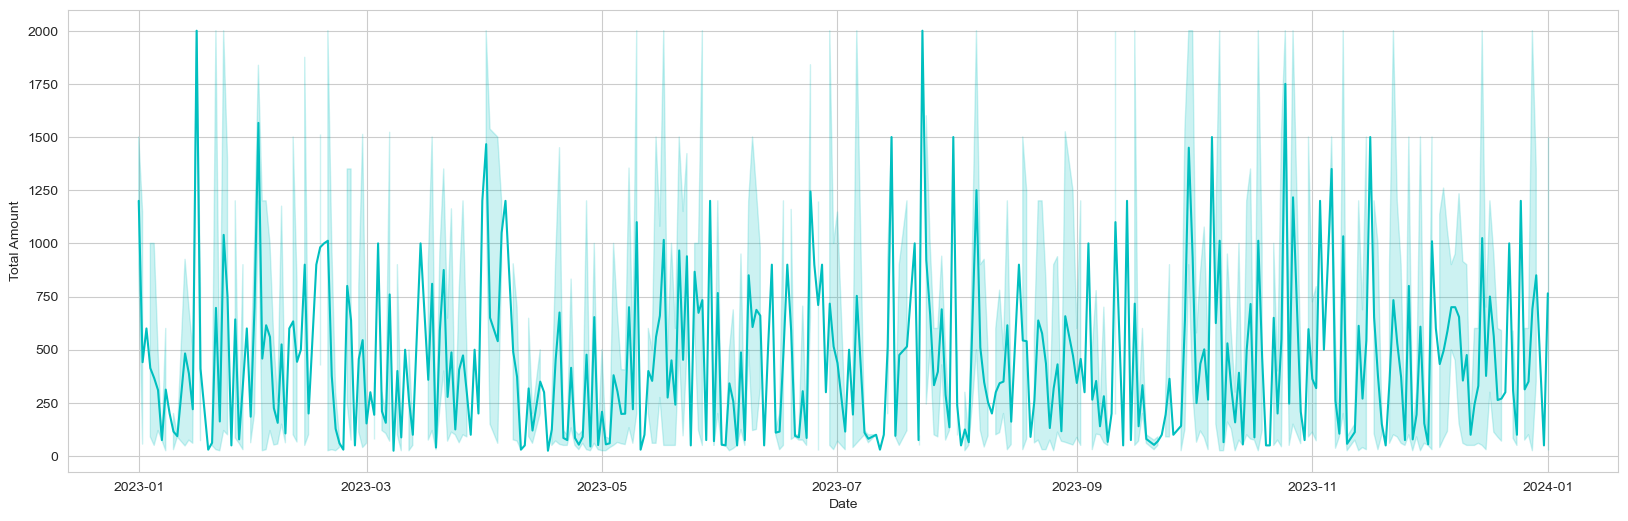

In [21]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Create a line plot using Seaborn to visualize the 'Total Amount' over time
sns.lineplot(data=df, x=df['Date'], y=df['Total Amount'], color='c')

# Show the plot
plt.show()